### 【問題1】中心点の初期値を決める
### 【問題2】SSEを求める関数の作成
### 【問題3】クラスタへの割り当て
### 【問題4】中心点の移動
### 【問題5】繰り返し
### 【問題6】異なる初期値で計算
### 【問題7】推定

In [5]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


class MyKMeans:
    def __init__(self, n_clusters, max_iter=1000, random_seed=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_seed)

    def fit(self, x):
        # 指定したクラスター数分のラベルを繰り返し作成するジェネレータを生成（0,1,2,0,1,2,0,1,2...みたいな感じ）
        cycle = itertools.cycle(range(self.n_clusters))
        # 各データポイントに対してクラスタのラベルをランダムに割り振る
        self.labels_ = np.fromiter(itertools.islice(cycle, x.shape[0]), dtype=np.int)
        self.random_state.shuffle(self.labels_)
        labels_prev = np.zeros(x.shape[0])
        # クラスターとする3点を準備
        self.cluster_centers_ = np.zeros((self.n_clusters, x.shape[1]))
        # 各データポイントが属しているクラスターが変化しなくなった、又は一定回数の繰り返しを越した場合は終了
        count = 0
        while not (self.labels_ == labels_prev).all() and count < self.max_iter:
            # SSE
            # 各クラスターの重心を計算
            for i in range(self.n_clusters):
                xx = x[self.labels_ == i, :]
                self.cluster_centers_[i, :] = xx.mean(axis=0)
            # 各データポイントと各クラスターの重心間の距離を総当たりで計算
            dist = ((x[:, :, np.newaxis] - self.cluster_centers_.T[np.newaxis, :, :]) ** 2).sum(axis=1)
            # 1つ前のクラスターラベルを覚えておく。1つ前のラベルとラベルが変化しなければプログラムは終了する。
            labels_prev = self.labels_
            # 再計算した結果、最も距離の近いクラスターのラベルを割り振る
            self.labels_ = dist.argmin(axis=1)
            count += 1

    def predict(self, X):
        dist = ((X[:, :, np.newaxis] - self.cluster_centers_.T[np.newaxis, :, :]) ** 2).sum(axis=1)
        labels = dist.argmin(axis=1)
        return labels

In [6]:
# 適当なデータセットを作成する
np.random.seed(0)
points1 = np.random.randn(80, 2)
points2 = np.random.randn(80, 2) + np.array([4,0])
points3 = np.random.randn(80, 2) + np.array([5,8])

points = np.r_[points1, points2, points3]
np.random.shuffle(points)

# 3つのクラスタに分けるモデルを作成
model = MyKMeans(3)
model.fit(points)

print(model.labels_)

[1 0 2 1 0 0 2 0 1 2 0 0 2 0 2 2 0 0 2 1 2 0 1 2 0 1 2 1 0 1 0 0 0 2 0 2 0
 1 1 0 0 0 0 1 2 0 0 0 2 1 0 2 1 0 2 0 2 1 1 1 1 1 0 2 0 2 2 0 0 0 0 0 2 0
 2 2 2 1 0 2 1 2 0 0 2 0 1 2 1 1 1 2 2 2 1 2 2 2 1 2 1 0 0 0 0 0 2 0 1 0 1
 2 0 1 1 0 1 2 1 1 1 2 2 1 2 1 0 1 1 2 0 1 0 1 1 1 0 2 1 0 0 1 2 2 2 1 0 0
 0 2 2 2 0 0 1 2 0 2 2 2 1 2 2 2 2 2 1 1 0 1 2 1 1 2 0 1 1 1 1 0 2 1 0 1 1
 2 1 2 2 2 1 2 0 1 2 2 2 0 0 0 0 1 1 2 1 1 1 2 2 0 0 1 1 2 0 0 1 0 1 1 2 1
 0 1 2 1 0 1 2 2 1 1 2 1 2 1 0 1 1 2]


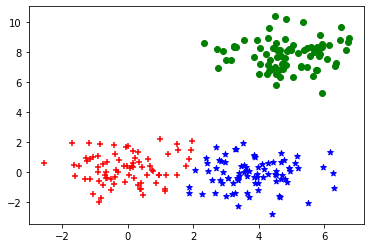

In [7]:
markers = ["+", "*", "o"]
color = ['r', 'b', 'g']
for i in range(3):
    p = points[model.labels_ == i, :]
    plt.scatter(p[:, 0], p[:, 1], marker = markers[i], color = color[i])
plt.show()

### 【問題8】エルボー法の実装

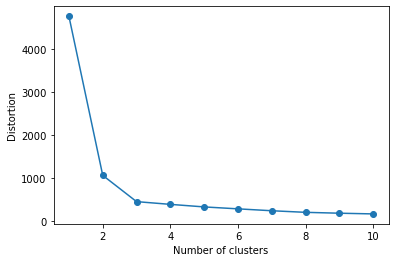

In [8]:
np.random.seed(0)
points1 = np.random.randn(80, 2)
points2 = np.random.randn(80, 2) + np.array([4, 0])
points3 = np.random.randn(80, 2) + np.array([5, 8])

points = np.r_[points1, points2, points3]
np.random.shuffle(points)

distortions = []
for i in range(1, 11):  # 1~10クラスタまで一気に計算
    km = KMeans(n_clusters=i,
                init='k-means++',  # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(points)  # クラスタリングの計算を実行
    distortions.append(km.inertia_)  # km.fitするとkm.inertia_が得られる
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### 次元削減

In [21]:
import numpy as np
import pandas as pd

df_base = pd.read_csv("../data/WholesaleCustomersData.csv").drop(['Region', 'Channel'], axis=1)

# 次元削減
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_base)
df_base_pca = pca.transform(df_base)

df_base_pca[:5]

array([[  650.02212207,  1585.51909007],
       [-4426.80497937,  4042.45150884],
       [-4841.9987068 ,  2578.762176  ],
       [  990.34643689, -6279.80599663],
       [10657.99873116, -2159.72581518]])

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


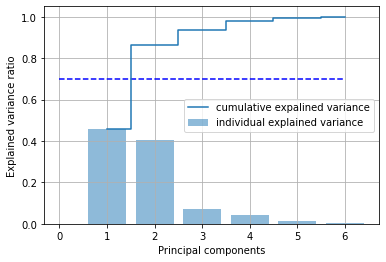

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(df_base)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6, "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

### 【問題10】クラスタ数kの選択

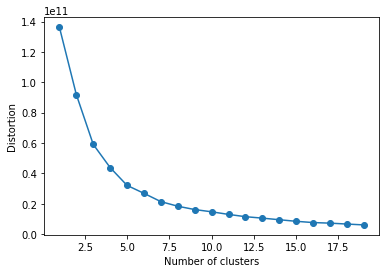

In [39]:
distortions = []
for i in range(1, 20): # 探索するクラスタ数レンジ
    km = KMeans(n_clusters=i,
                init='k-means++',  # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_base_pca)  # クラスタリングの計算を実行
    distortions.append(km.inertia_)  # km.fitするとkm.inertia_が得られる
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

12クラスタらあまり変わらなくなっているので、「12」を最適としてよい

### 【問題11】既知のグループとの比較

In [41]:
tmp = pd.read_csv("../data/WholesaleCustomersData.csv")
display(tmp.loc[:, ["Region", "Channel"]])
display(tmp.drop(['Region', 'Channel'], axis=1))

,Region,Channel
0,3,2
1,3,2
2,3,2
3,3,1
4,3,2
...,...,...
435,3,1
436,3,1
437,3,2
438,3,1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


```
Channel, Region　は分類済みのグループであり、カテゴリであるため、分類はできない。
Channel, Region 以外の値は連続値であるため、分類できる。
```

### 【問題12】卸売業者にとって有益な情報

array([[  650.02212207,  1585.51909007],
       [-4426.80497937,  4042.45150884],
       [-4841.9987068 ,  2578.762176  ],
       [  990.34643689, -6279.80599663],
       [10657.99873116, -2159.72581518]])

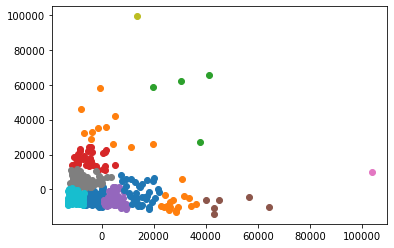

In [47]:
df_base = pd.read_csv("../data/WholesaleCustomersData.csv").drop(['Region', 'Channel'], axis=1)

# 次元削減
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_base)
df_base_pca = pca.transform(df_base)

display(df_base_pca[:5])

km = KMeans(n_clusters=12,
    init='k-means++',  # k-means++法によりクラスタ中心を選択
    max_iter=300,
    random_state=0)
km.fit(df_base_pca)  # クラスタリングの計算を実行

for i in range(12):
    p = df_base_pca[km.labels_ == i, :]
    plt.scatter(p[:, 0], p[:, 1], marker="o")
plt.show()

In [48]:
df_base = pd.read_csv("../data/WholesaleCustomersData.csv")
df_base.groupby(['Region','Channel']).mean()

Fresh          Milk       Grocery       Frozen  \
Region Channel                                                          
1      1        12902.254237   3870.203390   4026.135593  3127.322034   
       2         5200.000000  10784.000000  18471.944444  2584.111111   
2      1        11650.535714   2304.250000   4395.500000  5745.035714   
       2         7289.789474   9190.789474  16326.315789  1540.578947   
3      1        13878.052133   3486.981043   3886.734597  3656.900474   
       2         9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Region Channel                                 
1      1              950.525424  1197.152542  
       2             8225.277778  1871.944444  
2      1              482.714286  1105.892857  
       2             8410.263158  1239.000000  
3      1              786.682464  1518.284360  
       2             6899.238095  1826.209524

```
Retailの方が、取引先あたりの卸売額が大きい
取引先あたりの卸売額が多いのは
- Lisbon,Retail
- Other Region,Retail
- Oporto,Retail
```

```
memo:
https://select-from-where.hatenablog.com/entry/2017/09/24/202340
https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2
```